In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from PIL import Image

In [11]:
image = Image.open('/content/catpiccartoon.jpeg').convert('L')  # 'L' mode is for grayscale
image = np.array(image)

array([[250, 250, 250, ..., 250, 250, 250],
       [250, 250, 250, ..., 250, 250, 250],
       [250, 250, 250, ..., 250, 250, 250],
       ...,
       [250, 250, 250, ..., 250, 250, 250],
       [250, 250, 250, ..., 250, 250, 250],
       [250, 250, 250, ..., 250, 250, 250]], dtype=uint8)
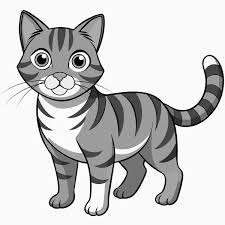

In [12]:
image

Defining the convolve function(instead of using cv2)

In [13]:

def convolve(image, kernel):
    h, w = image.shape
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
    #padded it with zero's in case we have an image with edges close to the edge, even though here technically we dont need it because the cat isnt close to the edge
    output = np.zeros_like(image, dtype=float)
    for i in range(h):
        for j in range(w):
            region = padded_image[i:i+kh, j:j+kw]
            output[i, j] = np.sum(region * kernel)

    return output

DOING IT WITH SOBEL

In [15]:
#kernels
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])

In [16]:
#applying convolve to detect vertical and horizontal edges
edge_x = convolve(image, sobel_x)
edge_y = convolve(image, sobel_y)

(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

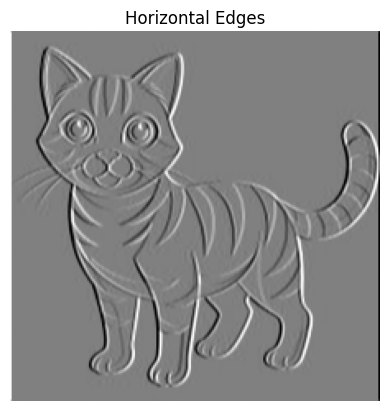

In [20]:

plt.imshow(edge_x, cmap='gray')
plt.title('Horizontal Edges')
plt.axis('off')

(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

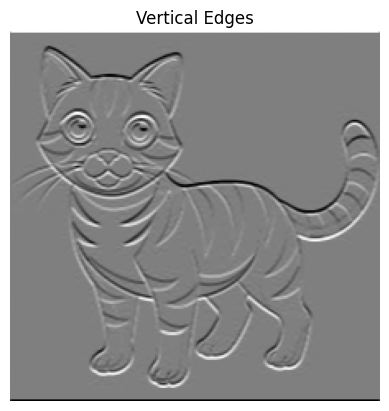

In [18]:
plt.imshow(edge_y, cmap='gray')
plt.title('Vertical Edges')
plt.axis('off')

(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

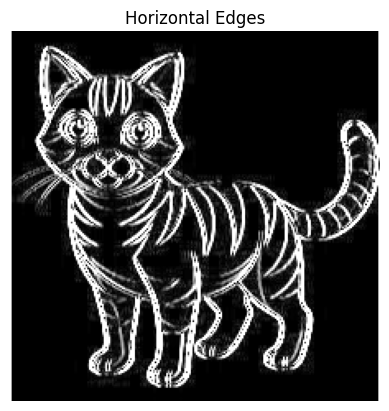

In [24]:
# Convert to uint8 and clip values going beyond [0,25]
edge_x = np.clip(np.abs(edge_x), 0, 255).astype(np.uint8)
edge_y = np.clip(np.abs(edge_y), 0, 255).astype(np.uint8)

plt.imshow(edge_x, cmap='gray')
plt.title('Horizontal Edges')
plt.axis('off')





(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

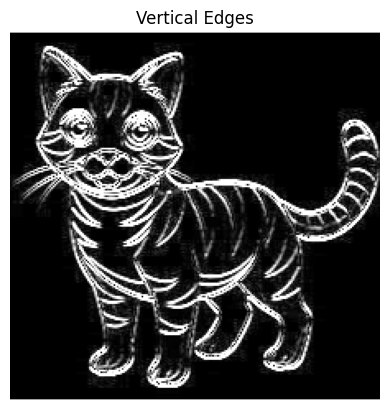

In [25]:
plt.imshow(edge_y, cmap='gray')
plt.title('Vertical Edges')
plt.axis('off')

(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

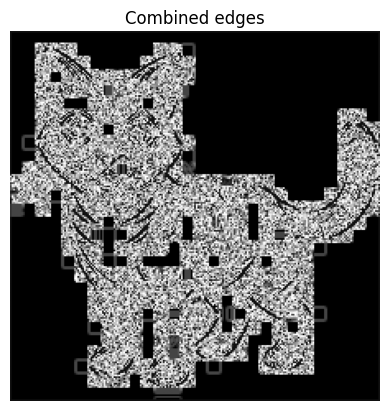

In [26]:
#to combine them
edge_magnitude = np.sqrt(edge_x**2 + edge_y**2)
edge_magnitude = np.clip(edge_magnitude, 0, 255).astype(np.uint8)
plt.imshow(edge_magnitude, cmap='gray')
plt.title('Combined edges')
plt.axis('off')


(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

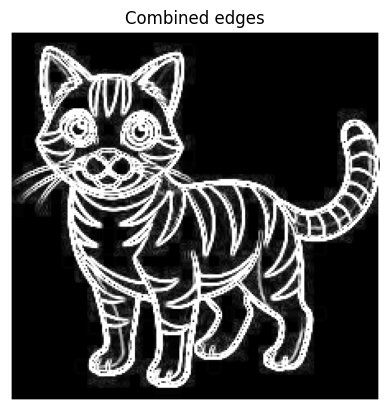

In [28]:
# the combined one looks bad so I found that we have to convert the edge_x and edge_y to float first to prevent overflow
edge_x = edge_x.astype(np.float32)
edge_y = edge_y.astype(np.float32)


edge_magnitude = np.sqrt(edge_x**2 + edge_y**2)
edge_magnitude = np.clip(edge_magnitude, 0, 255).astype(np.uint8)
plt.imshow(edge_magnitude, cmap='gray')
plt.title('Combined edges')
plt.axis('off')


DOING IT WITH SCHARR

In [29]:
#kernels
scharr_x = np.array([[-3, 0, 3],
                     [-10, 0, 10],
                     [-3, 0, 3]])

scharr_y = np.array([[-3, -10, -3],
                     [ 0,   0,  0],
                     [ 3,  10,  3]])

(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

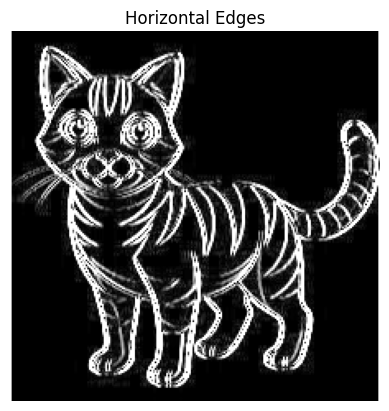

In [31]:
#doing everything else the same
edge_x = convolve(image, sobel_x)
edge_y = convolve(image, sobel_y)

edge_x = np.clip(np.abs(edge_x), 0, 255).astype(np.uint8)
edge_y = np.clip(np.abs(edge_y), 0, 255).astype(np.uint8)

plt.imshow(edge_x, cmap='gray')
plt.title('Horizontal Edges')
plt.axis('off')




(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

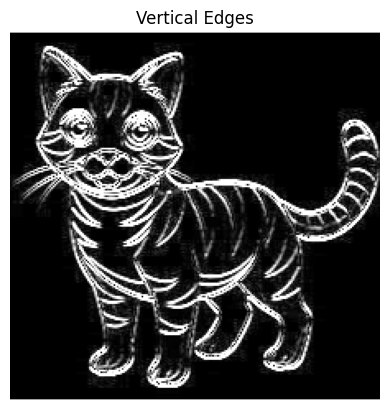

In [32]:
plt.imshow(edge_y, cmap='gray')
plt.title('Vertical Edges')
plt.axis('off')

(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

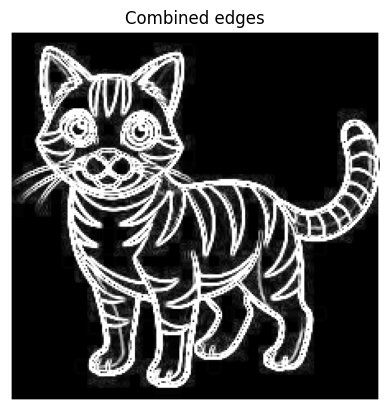

In [33]:
edge_x = edge_x.astype(np.float32)
edge_y = edge_y.astype(np.float32)


edge_magnitude = np.sqrt(edge_x**2 + edge_y**2)
edge_magnitude = np.clip(edge_magnitude, 0, 255).astype(np.uint8)
plt.imshow(edge_magnitude, cmap='gray')
plt.title('Combined edges')
plt.axis('off')

DOING IT WITH FELDMAN

In [34]:
#kernels
feldman_x = np.array([[-1, 0, 1],
                      [-1, 0, 1],
                      [-1, 0, 1]])

feldman_y = np.array([[-1, -1, -1],
                      [ 0,  0,  0],
                      [ 1,  1,  1]])

(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

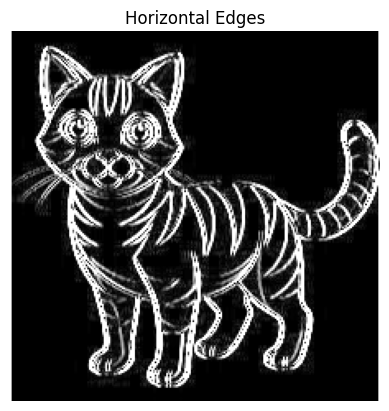

In [35]:
edge_x = convolve(image, sobel_x)
edge_y = convolve(image, sobel_y)

edge_x = np.clip(np.abs(edge_x), 0, 255).astype(np.uint8)
edge_y = np.clip(np.abs(edge_y), 0, 255).astype(np.uint8)

plt.imshow(edge_x, cmap='gray')
plt.title('Horizontal Edges')
plt.axis('off')

(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

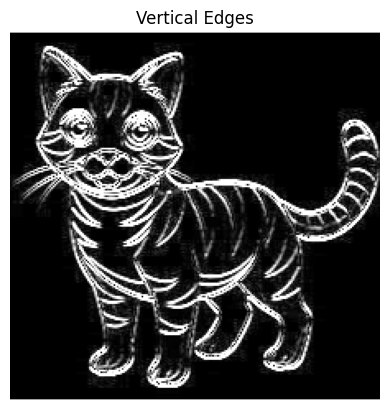

In [36]:
plt.imshow(edge_y, cmap='gray')
plt.title('Vertical Edges')
plt.axis('off')

(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

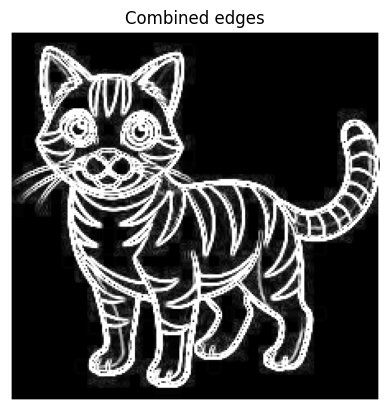

In [37]:
edge_x = edge_x.astype(np.float32)
edge_y = edge_y.astype(np.float32)


edge_magnitude = np.sqrt(edge_x**2 + edge_y**2)
edge_magnitude = np.clip(edge_magnitude, 0, 255).astype(np.uint8)
plt.imshow(edge_magnitude, cmap='gray')
plt.title('Combined edges')
plt.axis('off')

